In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aapl = pd.read_csv('AAPL_CLOSE', index_col='Date', parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col='Date', parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date', parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col='Date', parse_dates=True)

In [3]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis=1)
stocks.columns = ['aapl', 'cisco', 'ibm', 'amzn']

In [4]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [5]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [6]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [7]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [8]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


C:\Users\souvi\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\souvi\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\souvi\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\souvi\AppData\Roaming\Python\Python

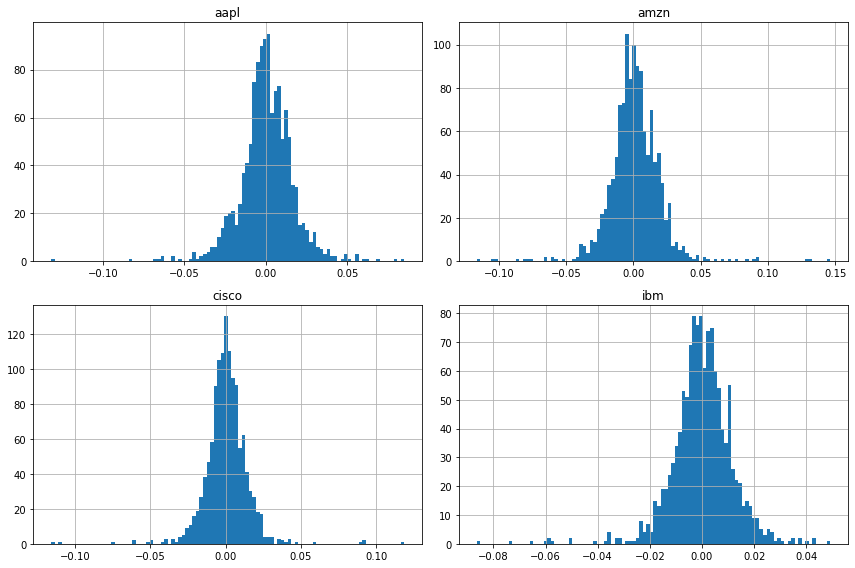

In [9]:
log_ret.hist(bins=100, figsize=(12, 8));
plt.tight_layout();

In [10]:
log_ret.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [32]:
np.random.seed(101)
#print(stocks.columns)
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)


for ind in range(num_ports):
    weights = np.array(np.random.random(4))

    weights = weights/np.sum(weights)
    
    all_weights[ind, :] = weights

    
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    #print(exp_ret)

    #Expected volatility
    #print('Expected volatility ')
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    #print(exp_vol)

    #Sharpe Ratio
    #print('Sharpe Ratio')
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
    #print(SR)

In [33]:
sharpe_arr.max()

1.0303260551271065

In [13]:
sharpe_arr.argmax()

1420

In [14]:
all_weights[1420, :]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [15]:
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

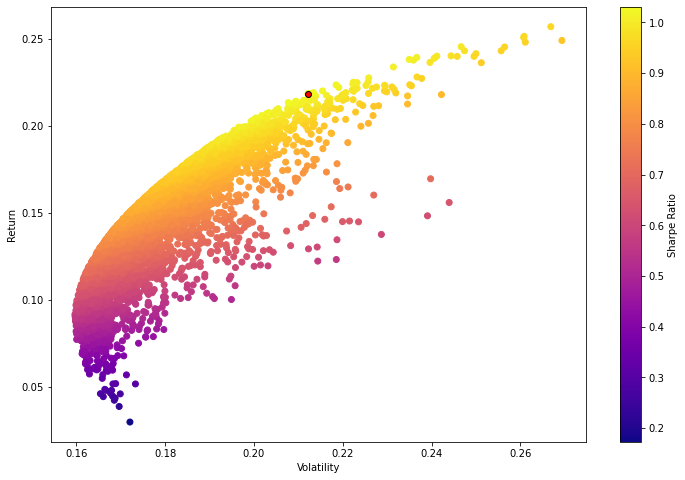

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c='red', edgecolors='black')

In [17]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

In [18]:
from scipy.optimize import minimize

In [19]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [20]:
def check_sum(weights):
    return np.sum(weights) - 1

In [21]:
cons = ({'type':'eq', 'fun':check_sum})

In [23]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [25]:
init_guess = [0.25, 0.25, 0.25, 0.25]

In [26]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons) 

In [27]:
opt_results

     fun: -1.030716870335557
     jac: array([ 5.64157963e-05,  4.18424606e-05,  3.39921713e-01, -4.44799662e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289764e-01, 2.04189828e-01, 4.40457133e-18, 5.29520408e-01])

In [28]:
opt_results.x

array([2.66289764e-01, 2.04189828e-01, 4.40457133e-18, 5.29520408e-01])

In [29]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [34]:
frontier_y = np.linspace(0, 0.3, 100)

In [35]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [37]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type': 'eq', 'fun':check_sum},
           {'type': 'eq', 'fun': lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    
    frontier_volatility.append(result['fun'])

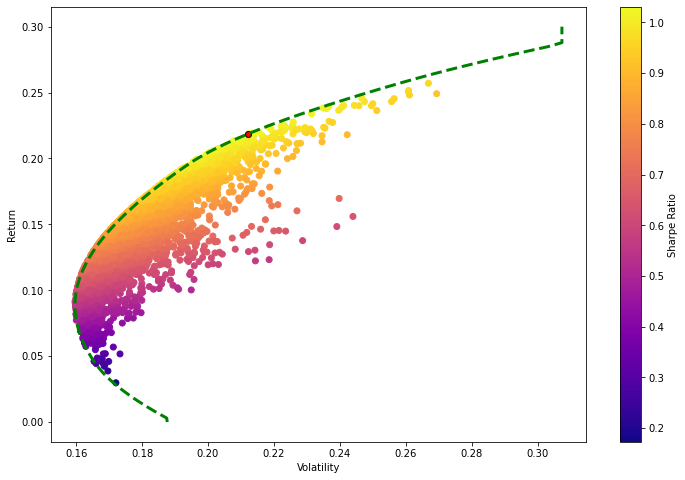

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c='red', edgecolors='black')

plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3)